>># **Ciencia de Datos en Python**
### Proyecto Final
###### *Marco Tulio Escobar Muñoz*

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import distplot
import seaborn as sns


class my_regresion():
    def __init__(self, archivo):
        self.beta0 = []
        self.beta1 = []
        self.x = [] 
        self.y = [] 
        self.yHat = [] 
        self.Error = [] 
        self.GradB0 = [] 
        self.GradB1 = []
        self.ParB0 = []
        self.ParB1 = []
        self.A = 0 
        self.B = 0
        self.C = 0 
        self.D = 0 
        self.E = 0 
        self.F = 0
        self.diccionario = dict()
        self.pdData = pd.DataFrame()
        self.y = []
        self.archivo = np.load(archivo)
        self.dsEntrenamientoNan = []
        self.flMedia = []
        self.flValorMaximo = []
        self.flValorMinimo = []
        self.flRango = []
        self.flDesviacionEstandar = []
        self.epochs = 0
        self.print_error = 0
        self.learing_rate = 0.0
        self.matriz = []
        self.ArrVal = []
        self.y2 = []
        #División de la Data entrenamiento y validación
        self.long = len(self.archivo)
        self.long80 = int(self.long * 0.80)
        self.long81 = int(self.long * 0.80) + 1
        self.long20 = self.long * 0.20
        self.dsEntrenamiento = self.archivo[0:self.long81]
        self.dsValidacion = self.archivo[self.long80:]
        
        #Exploración de la Data
    def GetExploraionData(self, dsDataSet):
        self.dsEntrenamientoNan = dsDataSet
        self.dsEntrenamientoNan[np.isnan(dsDataSet)] = 0
        self.flMedia = np.nanmean(dsDataSet,axis=1)
        self.flValorMaximo = np.nanmax(dsDataSet,axis=1)
        self.flValorMinimo = np.nanmin(dsDataSet,axis=1)
        self.flRango = np.ptp(dsDataSet,axis=1)
        self.flDesviacionEstandar = np.nanstd(dsDataSet,axis=1)
        
        return self.flMedia, self.flValorMaximo, self.flValorMinimo, self.flRango, self.flDesviacionEstandar
    
    #Diagrama de Histograma sobre los Datos usando Seaborn
    def GetHistogram(self, dsDataSet, var):
        dsDataSetA = dsDataSet[:,0].reshape(-1,1)
        dsDataSetB = dsDataSet[:,1].reshape(-1,1)
        dsDataSetC = dsDataSet[:,2].reshape(-1,1)
        dsDataSetD = dsDataSet[:,3].reshape(-1,1)
        dsDataSetE = dsDataSet[:,4].reshape(-1,1)
        dsDataSetF = dsDataSet[:,5].reshape(-1,1)
        sns.set_theme()
        if(var == 1):
            dis1 = distplot(dsDataSetA, dsDataSetB, rug=True, hist=False)
        if(var == 2):
            dis2 = distplot(dsDataSetA, dsDataSetC, rug=True, hist=False)
        if(var == 3):
            dis3 = distplot(dsDataSetA, dsDataSetD, rug=True, hist=False)
        if(var == 4):
            dis4 = distplot(dsDataSetA, dsDataSetE, rug=True, hist=False)
        if(var == 5):
            dis5 = distplot(dsDataSetA, dsDataSetF, rug=True, hist=False)
    
    #Correlación de los Datos
    
    def DivArrCoe(self, dsDataSet):
        #ρ = -1 Correlación perfecta negativa
        #ρ = 0  No existe correlación
        #ρ = +1 Correlación perfecta positiva
        #self.A, self.B, self.C, self.D, self.E, self.F = np.hsplit(dsDataSet,6)
        dsDataSetA = dsDataSet[:,0].reshape(-1,1)
        dsDataSetB = dsDataSet[:,1].reshape(-1,1)
        dsDataSetC = dsDataSet[:,2].reshape(-1,1)
        dsDataSetD = dsDataSet[:,3].reshape(-1,1)
        dsDataSetE = dsDataSet[:,4].reshape(-1,1)
        dsDataSetF = dsDataSet[:,5].reshape(-1,1)
        self.A = np.corrcoef(dsDataSet[:,0],dsDataSet[:,1])[1,0]
        self.B = np.corrcoef(dsDataSet[:,0],dsDataSet[:,2])[1,0]
        self.C = np.corrcoef(dsDataSet[:,0],dsDataSet[:,3])[1,0]
        self.D = np.corrcoef(dsDataSet[:,0],dsDataSet[:,4])[1,0]
        self.F = np.corrcoef(dsDataSet[:,0],dsDataSet[:,5])[1,0]
        self.E = max(self.A,self.B,self.C,self.D,self.F)
        if (self.E == self.A):
            plt.plot()
            plt.scatter(dsDataSetA,dsDataSetB)
            plt.title('Coeficiente ' + "{:.2f}".format(self.A))
            plt.xlabel("Eje X")
            plt.ylabel("Eje Y")
            plt.show()
        if (self.E == self.B):
            plt.scatter(dsDataSetA,dsDataSetC)
            plt.title('Coeficiente ' + "{:.2f}".format(self.B))
            plt.xlabel("Eje X")
            plt.ylabel("Eje Y")
            plt.show()
        if (self.E == self.C):
            plt.scatter(dsDataSetA,dsDataSetD)
            plt.title('Coeficiente ' + "{:.2f}".format(self.C))
            plt.xlabel("Eje X")
            plt.ylabel("Eje Y")
            plt.show()
        if (self.E == self.D):
            plt.scatter(dsDataSetA,dsDataSetE)
            plt.title('Coeficiente ' + "{:.2f}".format(self.D))
            plt.xlabel("Eje X")
            plt.ylabel("Eje Y")
            plt.show()
        if (self.E == self.F):
            plt.scatter(dsDataSetA,dsDataSetF)
            plt.title('Coeficiente ' + "{:.2f}".format(self.F))
            plt.xlabel("Eje X")
            plt.ylabel("Eje Y")
            plt.show()
        
    def TrainingModel(self, depX, indY, intEpochs, intPrintError, fltLearningRate):
        #inicializando variables
        self.beta0 = []
        self.beta1 = []
        self.yHat = []
        self.Error = []
        self.GradB1 = []
        self.GradB0 = []
        
        self.x = depX.reshape(-1,1) 
        self.y = indY.reshape(-1,1) 
        self.epochs = intEpochs
        self.print_error = intPrintError
        self.learning_rate = fltLearningRate
        self.pdData =  pd.DataFrame(self.x)
        self.pdData['1'] = 1
                      
        self.i = 0
        while self.i <= self.epochs:
            self.beta0.append(((len(self.x) * np.sum(self.x[self.i] * self.y[self.i])) - (np.sum(self.x[self.i])*np.sum(self.y[self.i]))) / ((len(self.x) * np.sum(self.x[self.i]**2)) - np.sum(self.x[self.i])**2))
            self.beta1.append(((len(self.x) * np.sum(self.x[self.i]**2) * np.sum(self.y[self.i])) - (np.sum(self.x[self.i]) * np.sum(self.y[self.i] * self.x[self.i]))) / ((len(self.x) * np.sum(self.x[self.i]**2)) - np.sum(self.x[self.i])**2))
            self.yHat.append((self.pdData[0][self.i] * self.beta0[self.i]) + (self.pdData['1'][self.i] * self.beta1[self.i]))    
            self.Error.append((1 / (2 * len(self.x))) * (len(self.x) * (np.sum(self.y[self.i] - self.yHat[self.i])**2)))
            self.GradB1.append(1 / len(self.x) * np.sum((self.yHat[self.i] - self.y[self.i]) * self.x[self.i]))
            self.GradB0.append(1 / len(self.x) * np.sum((self.yHat[self.i] - self.y[self.i])))
            if (len(my.ParB0) == 0 ):
                self.ParB0.append(0 - self.learning_rate * self.GradB0[self.i])
            else:
                self.ParB0.append(self.ParB0[self.i-1] - self.learning_rate * self.GradB0[self.i])
            if (len(my.ParB1) == 0 ):
                self.ParB1.append(0 - self.learning_rate * self.GradB1[self.i])
            else:    
                self.ParB1.append(self.ParB1[self.i-1] - self.learning_rate * self.GradB1[self.i])
            
            #self.diccionario[self.i] = [['Iteracion', self.i], ['Beta 0' , self.beta0[self.i]] , ['Beta 1' , self.beta1[self.i]], ['yHat', self.yHat[self.i]], ['Error' , self.Error[self.i]], ['Gradiante B0' , self.GradB0[self.i]], ['Gradiante B1' , self.GradB1[self.i]], ['Par B0' , self.ParB0[self.i]], ['Par B1' , self.ParB1[self.i]]]
            self.diccionario[self.i] = {'Iteracion':self.i, 'Beta 0':self.beta0[self.i], 'Beta 1':self.beta1[self.i], 'yHat':self.yHat[self.i], 'Error':self.Error[self.i], 'Gradiante B0':self.GradB0[self.i], 'Gradiante B1':self.GradB1[self.i], 'Par B0':self.ParB0[self.i], 'Par B1':self.ParB1[self.i]}
            
            self.i += 1
            
        return #self.diccionario, self.Error 
    
    def Graf(self, diccionario, error):
        plt.plot(diccionario.keys(), error)
        return
    
    def GrafIt(self, diccionario, IteraN):
        self.n = IteraN
        self.dic2 = diccionario
        self.dtData = pd.DataFrame()
        self.dtData2 = pd.DataFrame()
        m = 0
        n = max(self.diccionario.keys())
        m = self.n
        valores = []
        while(m<=n):
            valores.append(m)
            m += self.n
        self.dtData = pd.DataFrame(self.dic2)
        self.dtData = self.dtData.T
        self.dtData2 = self.dtData2.append(self.dtData[self.dtData.Iteracion.isin(valores)])
        #plt.scatter(self.x, self.y)
        plt.plot(self.dtData2['Iteracion'], 'b', self.dtData2['Error'],'r', self.dtData2['yHat'], 'y', linewidth=3)
        plt.title('Regresión Lineal')
        plt.xlabel('Iteración')
        plt.ylabel('Densidad')
        plt.show()

    def CalY(self):
        self.y2 = self.beta0 + (self.beta1 * self.x)

    def Prom(self, vectorX):
        self.promM = []
        self.promP = []
        self.promM = np.mean(self.y2)
        self.promP = np.mean(self.Y_pred)
        self.vec = [self.y2, self.Y_pred, self.promM, self.promP]
        return self.vec
    
    
    def Sklear(self, X, Y, fltTrain):
        from sklearn.model_selection import train_test_split
        #from sklearn.linear_model import LinearRegression
        #Separa datos entrenamiento y prueba
        Xi = []
        Yi = []
        Xi = X.reshape(-1,1)
        Yi = Y.reshape(-1,1)
        DataX = pd.DataFrame(Xi)
        DataY = pd.DataFrame(Yi)
        #DataY = pd.DataFrame(Yi[:,1])
        X = DataX.values.reshape(-1,1)
        Y = DataY.values.reshape(-1,1)
        #Y = DataY.values.reshape(-1,1)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y, test_size= fltTrain)
        #Algoritmo a usar
        self.lm = LinearRegression()
        #Entrenar el modelo
        self.lm.fit(self.X_train, self.y_train)
        #Realizo una predicción
        self.Y_pred = self.lm.predict(self.X_test)
        #Valor de la pendiente o coeficiente y
        self.lm.coef_
        #Valor de la intersección o coeficiente x
        self.lm.intercept_
        #Precisión del modelo
        self.lm.score(X_train, y_train)
        #Graficamos los datos junto con el modelo
        plt.scatter(X_test, y_test)
        plt.plot(X_test, Y_pred, color='red', linewidth=3)
        plt.title('Regresión Lineal')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()
            
            
    

In [421]:
my = my_regresion("proyecto_training_data.npy")

In [422]:
my.__init__

<bound method my_regresion.__init__ of <__main__.my_regresion object at 0x000001BB848E22B0>>

In [423]:
my.GetExploraionData(my.dsEntrenamiento)

(array([35239.83333333, 30805.        , 37750.33333333, ...,
        41521.83333333, 29338.33333333, 39717.33333333]),
 array([208500., 181500., 223500., ..., 245350., 173000., 235000.]),
 array([7., 6., 6., ..., 7., 6., 6.]),
 array([208493., 181494., 223494., ..., 245343., 172994., 234994.]),
 array([77487.55164846, 67396.91578255, 83072.83863106, ...,
        91158.42669846, 64251.45434584, 87336.02445281]))

D:\Users\Tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Users\Tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


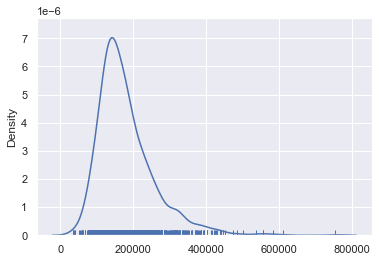

In [424]:
my.GetHistogram(my.dsEntrenamiento,1)

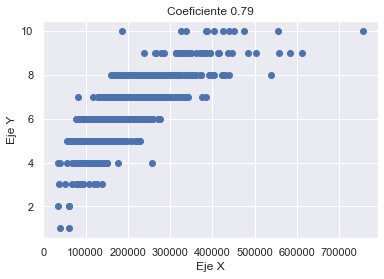

In [425]:
my.DivArrCoe(my.dsEntrenamiento)

In [426]:
my.TrainingModel(my.dsEntrenamiento[:,0], my.dsEntrenamiento[:,1], 12,10,45)

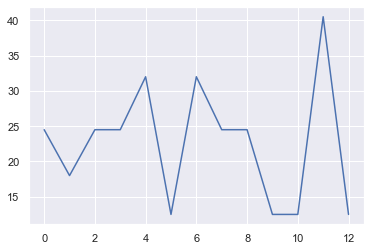

In [427]:
my.Graf(my.diccionario, my.Error)

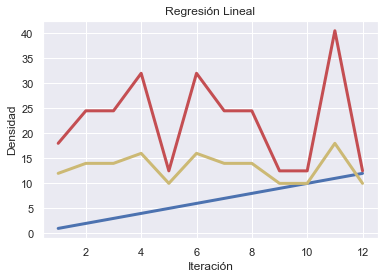

In [428]:
my.GrafIt(my.diccionario,1)

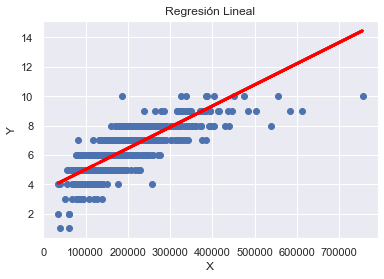

In [429]:
my.Sklear(my.dsEntrenamiento[:,0],my.dsEntrenamiento[:,1],0.2)

In [430]:
my.CalY()

In [431]:
my.Prom(my.dsEntrenamiento[:,0])

[array([[1459500.00003357, 1251000.00003306, 1459500.00003132, ...,
         1042500.00003861, 1876500.00002609, 1042500.00003472],
        [1270500.00003357, 1089000.00003306, 1270500.00003132, ...,
          907500.00003861, 1633500.00002609,  907500.00003472],
        [1564500.00003357, 1341000.00003306, 1564500.00003132, ...,
         1117500.00003861, 2011500.00002609, 1117500.00003472],
        ...,
        [1717450.00003357, 1472100.00003306, 1717450.00003132, ...,
         1226750.00003861, 2208150.00002609, 1226750.00003472],
        [1211000.00003357, 1038000.00003306, 1211000.00003132, ...,
          865000.00003861, 1557000.00002609,  865000.00003472],
        [1645000.00003357, 1410000.00003306, 1645000.00003132, ...,
         1175000.00003861, 2115000.00002609, 1175000.00003472]]),
 array([[ 6.87317753],
        [ 5.25858889],
        [ 5.34000831],
        [ 5.38968796],
        [ 5.38278801],
        [ 5.12748981],
        [ 7.16987544],
        [ 5.54838685],
        [